# US Domestic airline performance Exploratory analysis
## by Rajesh dharavath

## Preliminary Wrangling

> This document explores a dataset containing US flight data and attributes for approximately 653700 flights.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df2 = pd.read_csv('2007.csv')
df2.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [4]:
df3 =df2.query('UniqueCarrier==["WN","AA","UA","DL","F9"]')
df3['DepTime'].max()

2400.0

In [5]:
df_2007=df3.query('Origin==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [6]:
df_2007=df_2007.query('Dest==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [7]:
df_2008 = pd.read_csv('2008.csv')


In [8]:
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [9]:
df_2008= df_2008.query('UniqueCarrier==["WN","AA","UA","DL","F9"]')
df_2008.shape

(2803847, 29)

In [10]:
df_2008 =df_2008.query('Origin==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')

In [11]:
df_2008 =df_2008.query('Dest==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')
df_2008.shape

(232705, 29)

In [12]:
df_2006 = pd.read_csv('2006.csv')
df_2006.shape

(7141922, 29)

In [13]:
df_2006 = df_2006.query('UniqueCarrier==["WN","AA","UN","DL","F9"]')


In [14]:
df_2006 = df_2006.query('Origin==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')


In [15]:
df_2006 = df_2006.query('Dest==["ATL","DFW","LAS","LAX","PHX","ORD","DEN"]')
df_2006.shape

(178917, 29)

In [16]:
frames = [df_2006,df_2007,df_2008]
result=pd.concat(frames, ignore_index= True)
result.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,1,7,1043.0,1035,1157.0,1145,WN,121,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,1,7,1825.0,1800,1940.0,1905,WN,267,...,10.0,15.0,0,NaN,0,9.0,0.0,10.0,0.0,16.0
2,2006,1,1,7,1710.0,1700,1828.0,1805,WN,464,...,3.0,15.0,0,NaN,0,10.0,0.0,13.0,0.0,0.0
3,2006,1,1,7,1208.0,1155,1337.0,1305,WN,695,...,17.0,25.0,0,NaN,0,12.0,0.0,19.0,0.0,1.0
4,2006,1,1,7,845.0,845,1000.0,950,WN,764,...,5.0,20.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [17]:
result['DepTime']/=100.

In [18]:
result['ArrTime']/=100.

In [19]:
result['CRSDepTime']/=100.

In [20]:
result['CRSArrTime']/=100.

In [22]:
result.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,1,7,10.43,10.35,11.57,11.45,WN,121,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,1,7,18.25,18.00,19.40,19.05,WN,267,...,10.0,15.0,0,NaN,0,9.0,0.0,10.0,0.0,16.0
2,2006,1,1,7,17.10,17.00,18.28,18.05,WN,464,...,3.0,15.0,0,NaN,0,10.0,0.0,13.0,0.0,0.0
3,2006,1,1,7,12.08,11.55,13.37,13.05,WN,695,...,17.0,25.0,0,NaN,0,12.0,0.0,19.0,0.0,1.0
4,2006,1,1,7,8.45,8.45,10.00,9.50,WN,764,...,5.0,20.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [44]:
result.shape

(653700, 29)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

### What is the structure of your dataset?

> The structure of my dataset: Rows-653700
                               Columns- 29.
  There are a total of 653700 observations with 29 different variables. Most variables are numeric in nature, but the variables Year, Month, Origin, UniqueCarrier, Dest, Cancelled, CancellationCode, Diverted clarity are categorical variables.
  

### What is/are the main feature(s) of interest in your dataset?

>  There is a lot of information that needs to be obtained from the dataset. Like which origin, uniquecarrier are home to most cancellations. What are the reasons for cancellation,  In which year and month didi the most delays occur, How does different types of delays relate to one another.
  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features of the dataset that help me in my investigation are:
  
 > Categorical variables: Year, month, Origin, UniqueCarrier,Dest, CancellationCode, Cancelled, Diverted.
 > Numeric Variables: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraft

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.
> I'll start by looking at the main feature of interest "user_type"

### We will start the univariate exploration with barplot of the variable Year.

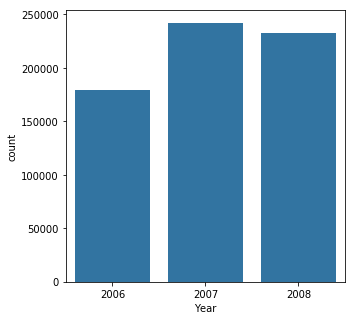

In [25]:
plt.figure(figsize = [5,5])
base_color = sb.color_palette()[0]
sb.countplot(data = result, x = 'Year', color = base_color);
plt.show()


- The above plot shows that in the year 2007 more flight data was recorded.

### Next up is barplot of the variable Day of week, to see on which day of the week most flight data was recorded.

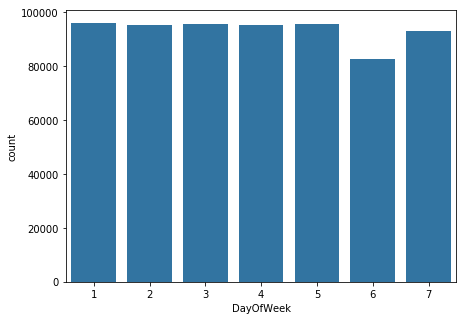

In [26]:
plt.figure(figsize = [7,5])
base_color = sb.color_palette()[0]
sb.countplot(data = result, x = 'DayOfWeek', color = base_color);
plt.show()


- From the above plot there isn't much difference between the days on the traffic of flights.

The above two plots show the flight data recorded in each year and each day of a week.

### I've filtered out some of the popular airlines in US which are in their short forms.
  - WN - South West Airlines,
  - DL- Delta Airlines,
  - F9- JetBLUE's Airlines,
  - AA- American Airlines,
  - UA- United Airlines,

###  I have filtered some of the popular uniquecarriers in us see their counts.

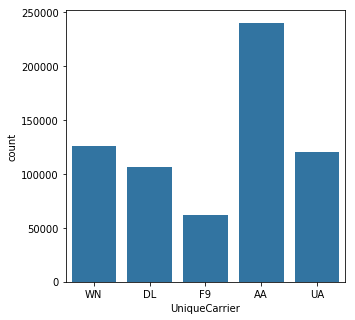

In [50]:
plt.figure(figsize = [5,5])
base_color = sb.color_palette()[0]
sb.countplot(data = result, x = 'UniqueCarrier', color = base_color);
plt.show()


This plot shows the count of each year from year 2006-2008. 

### Since the variable uniquecarrier is nominal, I want to put them in order of their count.

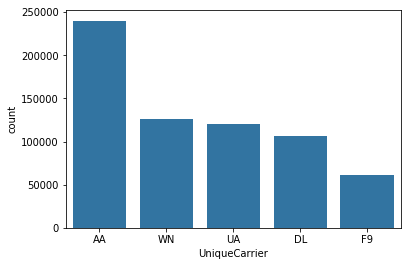

In [39]:

base_color = sb.color_palette()[0]
order_carriers = result['UniqueCarrier'].value_counts().index
sb.countplot(data = result, x = 'UniqueCarrier', color = base_color, order = order_carriers)


- From the above plot the count of the carrier AA(American Airlines) is the highest and the carrier F9(JetBlue's airlines) is the least.

####  I've also filtered out some of most traffic driven Origin and Destination airports. They are DEN- Denver International Airport, LAS- McCarran International Airport, LAX- LosAngeles International Aoirport, DFW-Dallas/Fort Worth International Airport, ORD- O'Hare International Airport, PHX-Phoenix Sky Harbor International Airport, ATL- Atlanta international Airport. Since this is a nominal data I've ordered the data in terms of their count.

#### Next I want to plot the counts of the Origin airports.

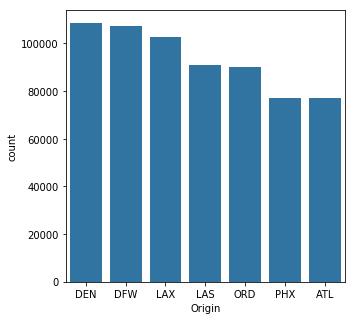

In [63]:
plt.figure(figsize = [5,5])
base_color = sb.color_palette()[0]
order_origin = result['Origin'].value_counts().index
sb.countplot(data = result, x = 'Origin', color = base_color, order = order_origin);
plt.show()

- The above plot shows that the the origin DEN is the most busiest origin airport among the filtered airports.

#### The next plot is similar to above the destination airports.

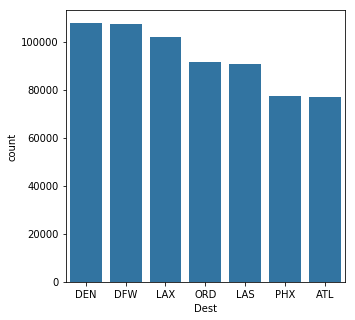

In [64]:
plt.figure(figsize = [5,5])
base_color = sb.color_palette()[0]
order_Dest = result['Dest'].value_counts().index
sb.countplot(data = result, x = 'Dest', color = base_color, order = order_Dest);
plt.show()

- From the above plot the busiest destination airport being DEN.

#### Now I want to plot how many flights were cancelled during the period 2006-2008.

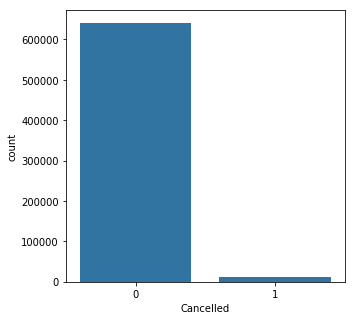

In [58]:
plt.figure(figsize = [5,5])
base_color = sb.color_palette()[0]
sb.countplot(data = result, x = 'Cancelled', color = base_color);
plt.show()

- The cancelled flights being very less comparatively.

Cancelled flights 0= No and 1= Yes.

#### I also want to look at the count of diverted flights.

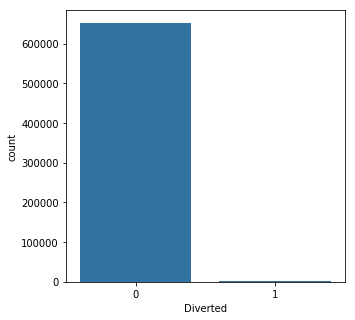

In [61]:
plt.figure(figsize = [5,5])
base_color = sb.color_palette()[0]
sb.countplot(data = result, x = 'Diverted', color = base_color);
plt.show()

- Diverted flights also seem to be comparatively very less.

Diverted flights 0= no and 1 = Yes.

#### Now I want to look at how various cancellation codes plays the role in cancellation of the flights.

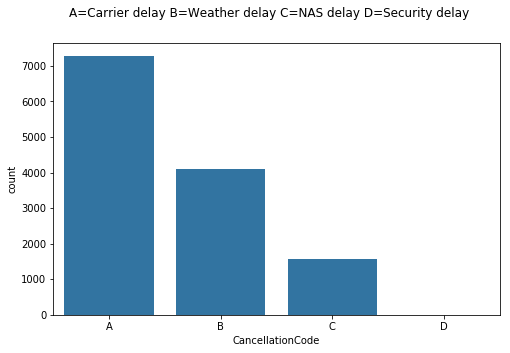

In [43]:
plt.figure(figsize = [8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = result, x = 'CancellationCode', color = base_color);
plt.suptitle('A=Carrier delay B=Weather delay C=NAS delay D=Security delay')
plt.show()

In the above plot the reasons for cancellation are indicated (A= Carrier delay), (B= Weather Delay), (C= NAS Delay), (D= Security Delay).

- From the above plot it looks like the cancellation code A (carrier delay) plays a major role in the cancellation of the flights while that of D has almost null effect on the cancellation of the flights.

#### Now I want to see at what time does most of the flights departure.

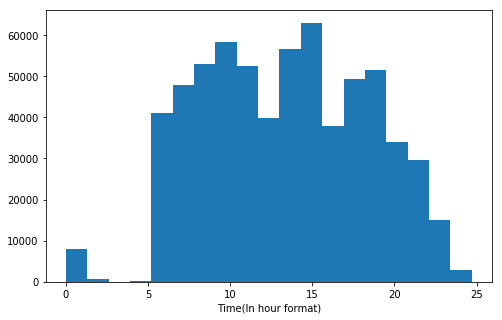

In [150]:
bin_edges = np.arange(0, result['DepTime'].max()+1.3, 1.3)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'DepTime', bins = bin_edges);
plt.xlabel('Time(In hour format)')
plt.show()

- From the above histogram  Departure Time of the flights, most of the flights Departure time falls in between 5 Hrs and 24 Hrs.

#### Now i want to look at the histogram of  scheduled departure.

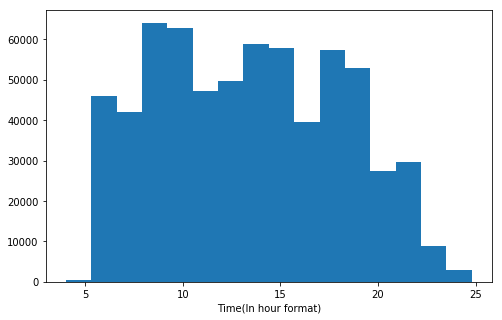

In [109]:
bin_edges = np.arange(4, result['CRSDepTime'].max()+1.3, 1.3)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'CRSDepTime', bins = bin_edges);
plt.xlabel('Time(In hour format)')
plt.show()

- The Scheduled departure histogram seems to be multimodal.

#### Next I want to look at the actual elapsed time for the flights to travel from origin to destination.

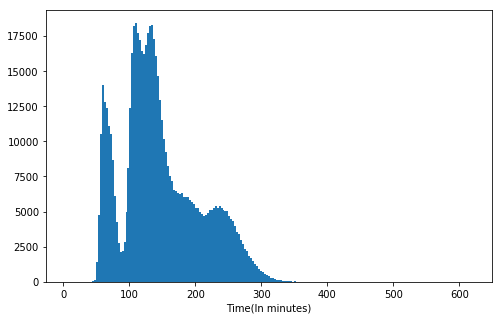

In [117]:
bin_edges = np.arange(4, result['ActualElapsedTime'].max()+3, 3)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'ActualElapsedTime', bins = bin_edges);
plt.xlabel('Time(In minutes)')
plt.show()

#### The graph looks multimodal with two spikes occurring roughly at 75 and 120. Since most of the points fall in the area 50-350. lets have a closer look by changing the axis limits.

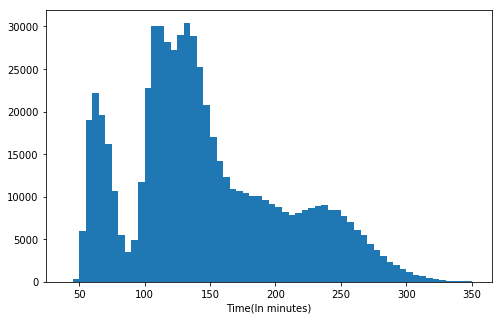

In [136]:
bin_edges = np.arange(40, 350+5, 5)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'ActualElapsedTime', bins = bin_edges);
plt.xlabel('Time(In minutes)')
plt.show()

 - There are very large spikes in frequency at the bars with bin sizes of 5; frequency quickly trails off until the next spike at 80. Hence the actual elapsed time of the selected carriers fall in the region 50-80 minutes and 100-150 minutes.

#### Sicne we looked at the histogram of the actual elapsed time lets also have a look at scheduled elapsed time.

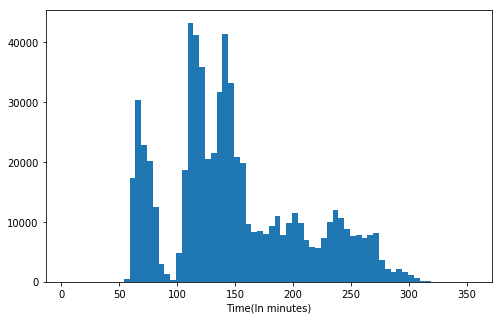

In [119]:
bin_edges = np.arange(4, 350+5, 5)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'CRSElapsedTime', bins = bin_edges);
plt.xlabel('Time(In minutes)')
plt.show()

- There are very large spikes in frequency at the bars with bin sizes of 5; frequency quickly trails off until the next spike at 100, 125, 160. 

#### How much delay occurs due to carrier delay?. This is shown in the below histogram.

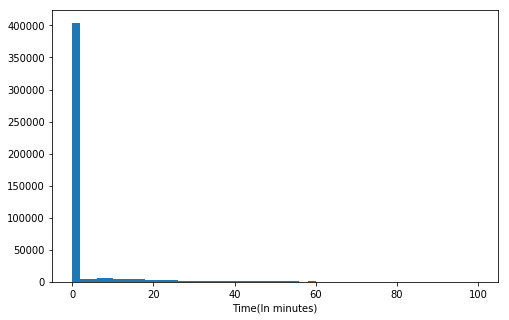

In [146]:
bin_edges = np.arange(0, 100+2, 2)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'CarrierDelay', bins = bin_edges);
plt.xlabel('Time(In minutes)')
plt.show()

- This graph still shows that most of the points lie the region 0-1 minute. So most of the delay occur in this range. Now lets see how the distribution looks by scaling the axis to log scale.

#### Scaling of the axis is required to get a clear view of the delay time due to various delay reasons.

#### I want to perform scaling of the x-axis to understand the distribution of carrier delay.

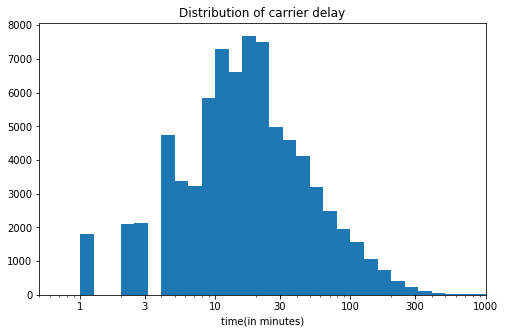

In [44]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['CarrierDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'CarrierDelay', bins = bins)
plt.title('Distribution of carrier delay')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time(in minutes)')
plt.xlim((0.5,1000))
plt.show()

- After scaling we can see a normally distributed graph showing most of the delay time falling in the region 5-30 minutes.

#### Next up is Weather delay histogram after scaling.

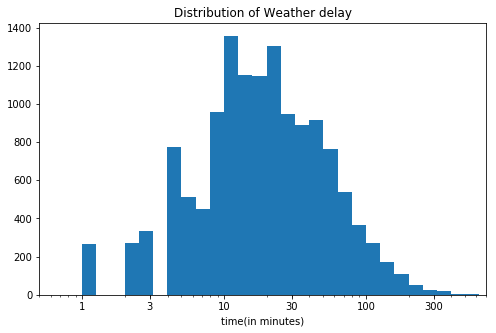

In [25]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['WeatherDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'WeatherDelay', bins = bins)
plt.title('Distribution of Weather delay')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time(in minutes)')
plt.xlim((0.5,700))
plt.show()

- weather delay in most cases being 5-30 minutes.

#### Now i want to look at the histogram of NAS delay.

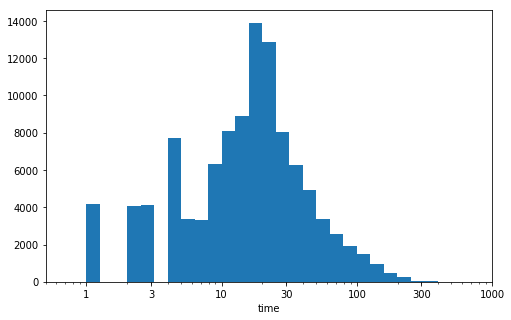

In [24]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['NASDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'NASDelay', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time')
plt.xlim(0.5,1000)
plt.show()

- NAS delay is also similar to that of carrier and weather, between 5-30 minutes.

#### Next histogram of security delay.

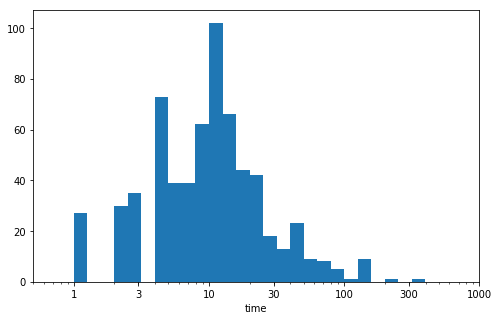

In [103]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['SecurityDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'SecurityDelay', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time')
plt.xlim((0.5,1000))
plt.show()

- Security delay also has most of the points in the region 5-30 minutes.

#### Next Lateaircraft delay histogram.

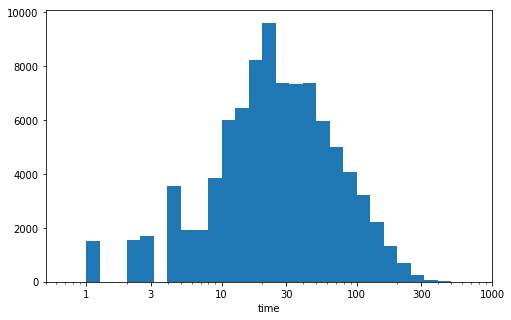

In [104]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['LateAircraftDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'LateAircraftDelay', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time')
plt.xlim((0.5,1000))
plt.show()

- Lateaircraft delay varying slightly with most of the points in the region 10-70 minutes.

From the above different types of delays the graph seems normally distributed with log scaling on the axis. But in case of not scaling the x-axis the most of the delay occurs in the region between 10-30 min. 

#### Now I want to look at the histogram of arrival delay.

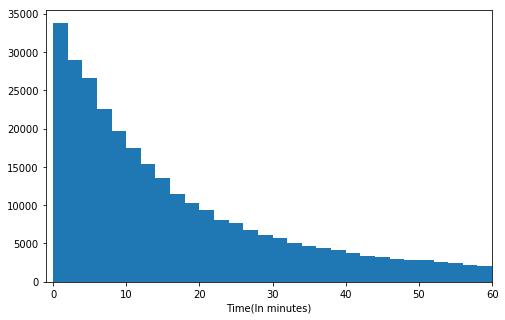

In [53]:
bin_edges = np.arange(0, 200+2, 2)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'ArrDelay', bins = bin_edges);
plt.xlabel('Time(In minutes)')
plt.xlim(-1,60)
plt.show()

- The above histogram of Arrival delay is right skewed with most of the values falling in the region 0-25 minutes.

#### Since the above graph seems right skewed i want to plot a normal distribution of the variable arrival delay.

#### Now I want to plot the log normal distribution of the variable arrival delay.

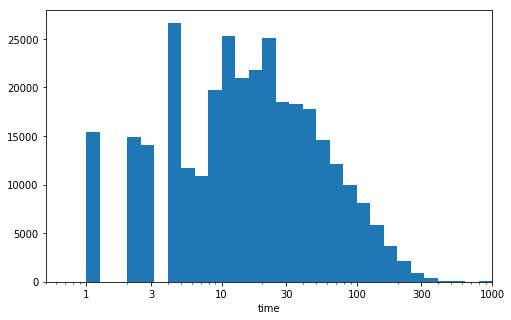

In [105]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['ArrDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'ArrDelay', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time')
plt.xlim((0.5,1000))
plt.show()

- From the above normal distribution, the arrival delay seems to be highly concentrated in the region 5-60 min.

#### Next I want to look at the distribution of the variable departure delay.

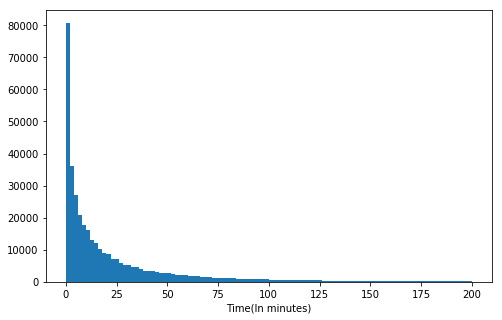

In [135]:
bin_edges = np.arange(0, 200+2, 2)
plt.figure(figsize=[8,5])
plt.hist(data = result, x = 'DepDelay', bins = bin_edges);
plt.xlabel('Time(In minutes)')
plt.show()

- The above histogram of Departure delay is right skewed with most of the values falling in the region 0-25 minutes.

#### I want to look at the log normal distribution of the variable Departure delay.

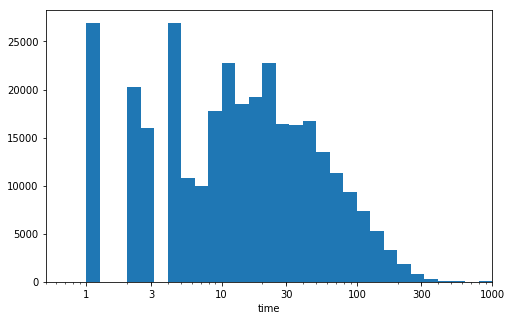

In [106]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(result['DepDelay'].max())+log_binsize, log_binsize)
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000]
labels= ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = result, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('time')
plt.xlim((0.5,1000))
plt.show()

- The density of the points fall in the region 5-60 min.

For all the different types of delays occuring there seems to bea gradual tailing of the frequency with most of the delays occuring between 5-60 minutes and there are some outliers occuring at around 1000 minutes.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The delay variables (Weather delay, security delay, nas delay, carrier delay, late air craft delay) have all the data points concentrated in very small region of 5-30min and there are outliers in each delay. So I used log transform to understand the data better.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are a lot of outliers in all delay variables. So i need to perform a transformation to focus on the data concentrated in dense region.

## Bivariate Exploration

>To start off with, I want to look at the pairwise correlations present between features in the data.

In [39]:



numeric_variables = ['ArrTime', 'DepTime','ArrDelay','DepDelay','CarrierDelay','WeatherDelay','SecurityDelay','NASDelay','LateAircraftDelay']

#### Firstly i want to look at the correlation between various numeric variables. The plot below shows the correlation between various numeric variables.

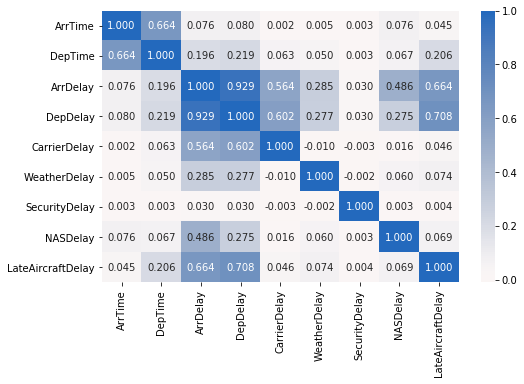

In [40]:
#Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(result[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

- In the above plot the darker colors show high correlation and the light colors show low correlation between variables.

#### Now I want to look at the relation between the variables actual elapsed time and crs elapsed time by plotting a scatter plot between the variables.

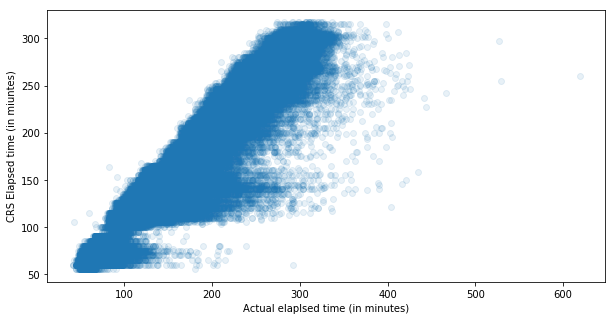

In [60]:
plt.figure(figsize=[10,5])
plt.scatter(data = result, x= 'ActualElapsedTime', y = 'CRSElapsedTime', alpha= 1/10)
plt.xlabel('Actual elaplsed time (in minutes)')
plt.ylabel('CRS Elapsed time (in miuntes)')
plt.show()

- A linear trend can be seen from the above scatter plot between Actual elapsed time and CRS Elapsed time.

#### Next i want to plot the relation between month and arrdelay, depdelay to see how the delays vary over the months.

#### First the plot between month and arrival delay as barplots.

C:\Users\rcraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'mean(ArrDelay)')

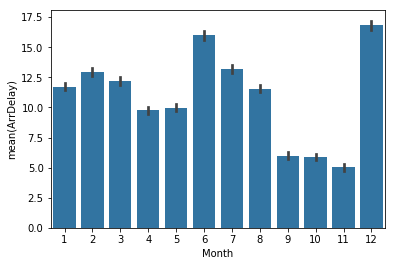

In [35]:
base_color = sb.color_palette()[0]
sb.barplot(data = result, x = 'Month', y = 'ArrDelay', color = base_color)
plt.ylabel('mean(ArrDelay)')





- From the above plot in the month december maximum arrival delay occurs.

#### Second, the barplot between the variable month and departure delay.

C:\Users\rcraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'mean(DepDelay)')

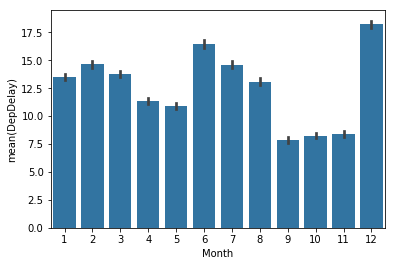

In [36]:
sb.barplot(data = result, x = 'Month', y = 'DepDelay', color = base_color)
plt.ylabel('mean(DepDelay)')


- Most of the departure departure delay occurs in the month 12.

The above two plots show the relation between the delay and months. To get a better visualization i used the mean of the delay variables.

#### Next, I want to look at the relation between reasons for cancellation and variables unique carrier, origin, month and year.

#### Now i want to plot the relation between variables uniquecarrier and cancellation code. To see how the cancellation varies with the carriers.

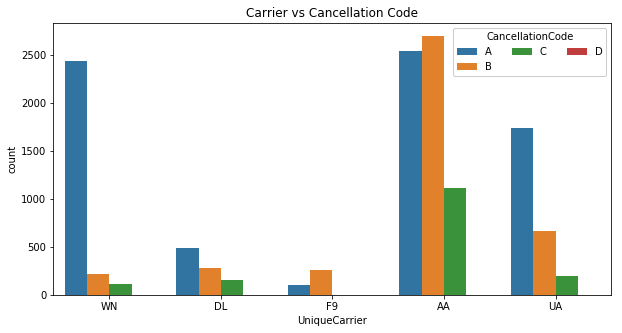

In [28]:
plt.figure(figsize= [10,5])
ax=sb.countplot(data = result, x = 'UniqueCarrier', hue = 'CancellationCode')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'CancellationCode');
plt.title('Carrier vs Cancellation Code');

From  the above plot we can observe the reasons of cancellation for the selected carriers.

A= Carrier delay, B= Weather delay, C= NAS delay, D= Security delay.




- For most of the carriers the reason for cancellation being mainly due to A and B, while due to D being null.

#### I want to plot a clustered bar chart between the variables origin and cancellation code. To oberve how the cancellation code varies at the different origin airports.

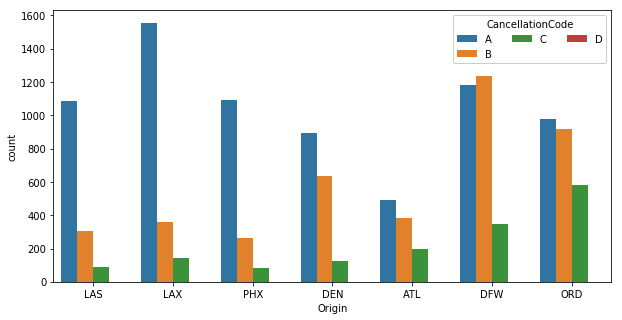

In [25]:
plt.figure(figsize= [10,5])
ax=sb.countplot(data = result, x = 'Origin', hue = 'CancellationCode')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'CancellationCode')

- From the above plot A and B being the two main reasons for cancellation. Also the origins DFW and ORD have the most cancellations.

#### Next i want to plot the relation between the variables month and cancellation code with clustered bar chart.

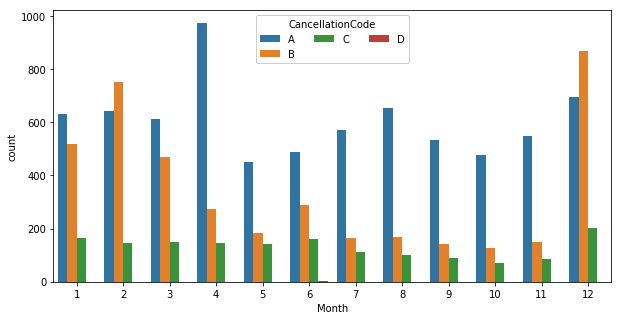

In [33]:
plt.figure(figsize= [10,5])
ax=sb.countplot(data = result, x = 'Month', hue = 'CancellationCode')
ax.legend(loc = 9, ncol = 3, framealpha = 1, title = 'CancellationCode')

- From the above plot the main reason for canellation being A. considering all the canellation codes in the month 12 most cancellations occur.

#### Next up is the plot between the variables year and cancellation code.

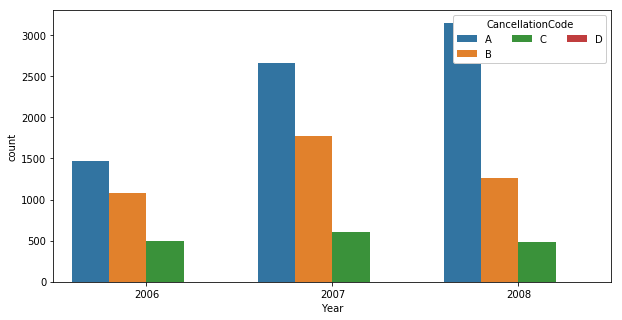

In [22]:
plt.figure(figsize= [10,5])
ax=sb.countplot(data = result, x = 'Year', hue = 'CancellationCode')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'CancellationCode')

The reasons for cancellation were plotted against variables unique carrier, month, year and origin.

The reasons being in the order A->B->C->D.

#### Now the relation between the variables Departure time and NAS delay.

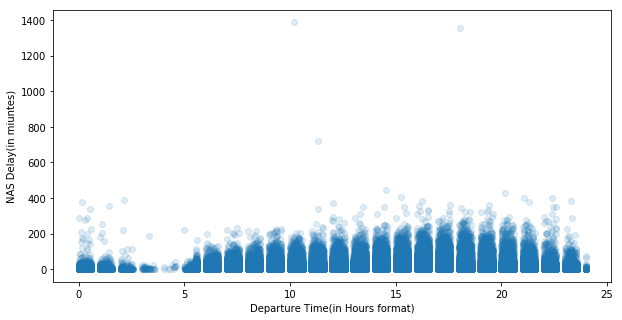

In [64]:
plt.figure(figsize=[10,5])
plt.scatter(data = result, x= 'DepTime', y = 'NASDelay', alpha= 1/7)
plt.xlabel('Departure Time(in Hours format)')
plt.ylabel('NAS Delay(in miuntes)')
plt.show()

- This scatter plot shows the relation between the variables departure time and NAS delay, Thus showing at time 20 hrs highest NAS delay occurs.

Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Most of the points fall in the region between 10-20 hrs. May be this is the time when most of the flights departure and NAS dekay occurs.

#### Next i want to look how different types of delays vary  with month and year.

C:\Users\rcraj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x720 with 0 Axes>

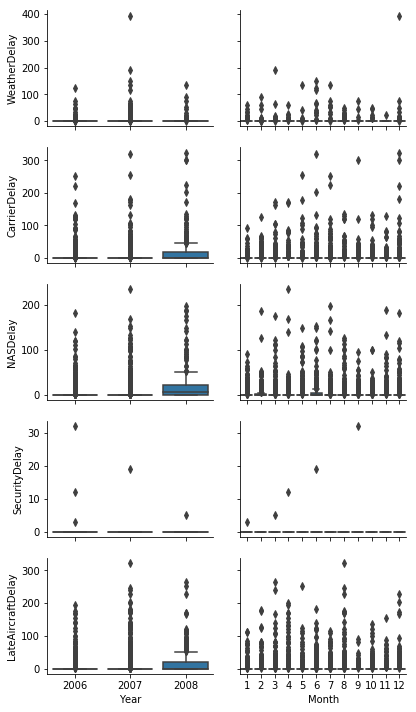

In [20]:
samples = np.random.choice(result.shape[0], 5000, replace = False)
result_samp = result.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = result_samp, y_vars = ['WeatherDelay', 'CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay'], x_vars = ['Year','Month'],
                size = 2, aspect = 1.5)
g.map(boxgrid)
plt.show();

- Since there are a lot of points I have taken some sample points and plotted the graph.

- These plots above doesn't seem to convey much of the information because the plots are not so clear. But still little information can be obtained.
- There are a lot of outliers in all the plots.

In [24]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

result[['log_ArrDelay','log_DepDelay']] = result[['ArrDelay','DepDelay']].apply(log_trans)

C:\Users\rcraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log10
C:\Users\rcraj\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in log10


#### The violin plots are not providing much information i want to look at the relation between variables through bar plots.
- first I want to plot the relation between variables origin, departure delay and destination, arrival delay.

C:\Users\rcraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Mean(ArrDelay)')

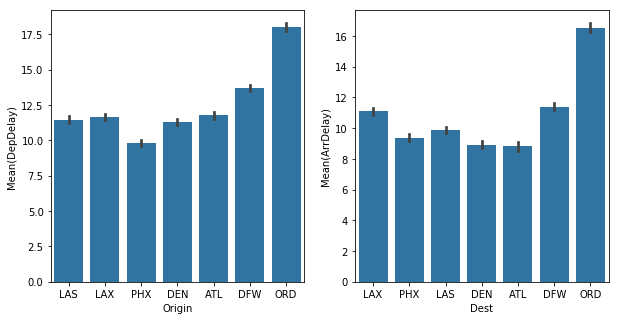

In [22]:
plt.figure(figsize=[10,5])
base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.barplot(data = result, x = 'Origin', y= 'DepDelay', color = base_color)
plt.ylabel('Mean(DepDelay)')

plt.subplot(1,2,2)
sb.barplot(data = result, x = 'Dest', y = 'ArrDelay', color = base_color)
plt.ylabel('Mean(ArrDelay)')



From both the plots ORD(O'Hare international Airport) shows the highest departure delay. Lets also look at the how the scaling of Delay shows the relationship.

#### Since the box plots of the variables with nomal axis values doesn't provide valuable information. I would like to plot the box plot with y-axis variable on log scale.

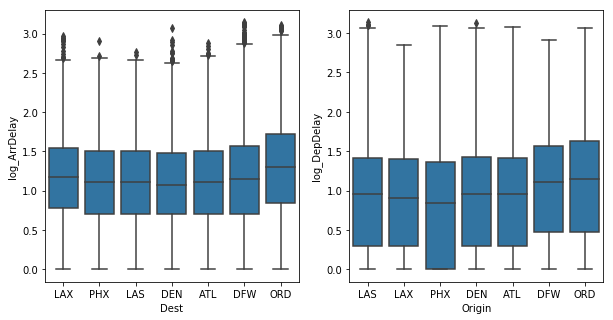

In [25]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots
base_color= sb.color_palette()[0]
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.boxplot(data = result, x = 'Dest', y = 'log_ArrDelay',color= base_color)

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sb.boxplot(data = result, x= 'Origin', y='log_DepDelay', color= base_color);


From the above box plot with variables Dest and Origin plotted against log transforms of the arrdelay and depdelay respectively, we can say that even after the log transform the result obtained through boxplot is in accordance with the barplot.

#### Now i want to look at the boxplot of the variables uniquecarrier, log arrival delay and log departure delay.

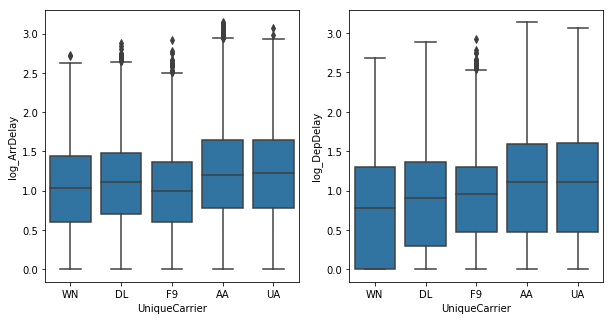

In [100]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots
base_color= sb.color_palette()[0]
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.boxplot(data = result, x = 'UniqueCarrier', y = 'log_ArrDelay',color= base_color)

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
sb.boxplot(data = result, x= 'UniqueCarrier', y='log_DepDelay', color= base_color);


Unique carrier aganist the arr and dep delay plotted as a boxplot shows us thar UA and AA are the two airlines with most delay.

####  Now lets move on to the variable "Cancelled" plotted against the variables origin, uniquecarrier, month, year.

C:\Users\rcraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Mean(cancelled)')

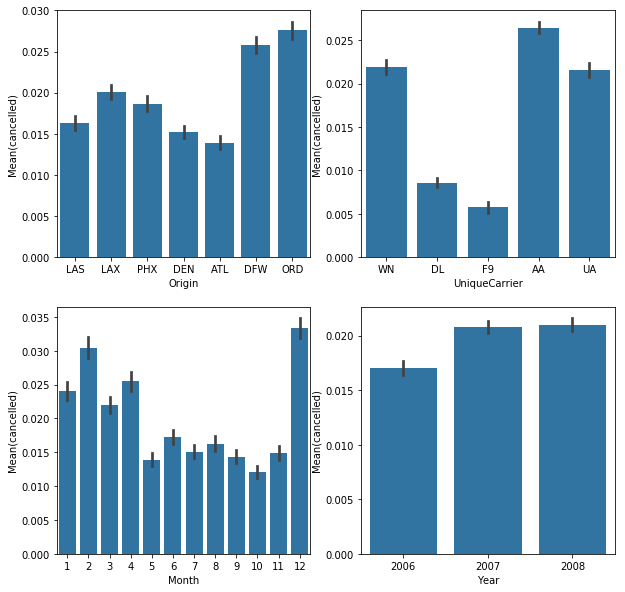

In [73]:
plt.figure(figsize=[10,10])
base_color = sb.color_palette()[0]
plt.subplot(2,2,1)
sb.barplot(data = result, x = 'Origin', y= 'Cancelled', color = base_color)
plt.ylabel('Mean(cancelled)')

plt.subplot(2,2,2)
sb.barplot(data = result, x = 'UniqueCarrier', y = 'Cancelled', color = base_color)
plt.ylabel('Mean(cancelled)')

plt.subplot(2,2,3)
sb.barplot(data = result, x = 'Month', y = 'Cancelled', color = base_color)
plt.ylabel('Mean(cancelled)')

plt.subplot(2,2,4)
sb.barplot(data = result, x = 'Year', y = 'Cancelled', color = base_color)
plt.ylabel('Mean(cancelled)')



Looking at the different variables that are plotted against Mean of cancelled. We observe that Origin('DFW', 'ORD'), Carrier(WN, AA, UA), Month(12, 2) and year(2008) have the highest cancelled flights.

#### Next lets see the relation between the variable diverted and the variables destination, uniquecarrier, month and year.

C:\Users\rcraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Mean(Diverted)')

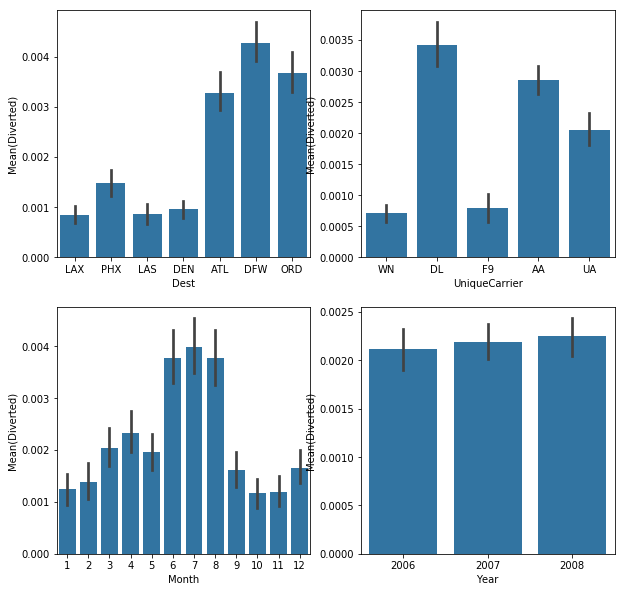

In [74]:
plt.figure(figsize=[10,10])
base_color = sb.color_palette()[0]
plt.subplot(2,2,1)
sb.barplot(data = result, x = 'Dest', y= 'Diverted', color = base_color)
plt.ylabel('Mean(Diverted)')

plt.subplot(2,2,2)
sb.barplot(data = result, x = 'UniqueCarrier', y = 'Diverted', color = base_color)
plt.ylabel('Mean(Diverted)')

plt.subplot(2,2,3)
sb.barplot(data = result, x = 'Month', y = 'Diverted', color = base_color)
plt.ylabel('Mean(Diverted)')

plt.subplot(2,2,4)
sb.barplot(data = result, x = 'Year', y = 'Diverted', color = base_color)
plt.ylabel('Mean(Diverted)')


This plot is similar to the above mean(cancelled) plot against different variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have looked at the realtion between cancellation code and various variables to see how delays are responsible for cancellation. 

> Most cancellations have occurred due to carrier delay and weather delay.

> Also the canellation due to Security delay being almost negligible.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>Expected relationships were found in this part of the investigation. A number of outliers were found in the delay plots and most of the data points were plotted in a small region.

> A correlation plot between the numeric variables was plotted at the beginning of this exploration which shows us that, Late aircraft delay and carrier delay shows a reasonable correlation with the arr delay and dep delay.

## Multivariate Exploration

> The main thing i want to explore in this part of the exploration is the how arr delay, dep delay, cancellation of flights relate to the variables month, year , origin and unique carrier when all these varibles are looked and plotted together.

#### First, lets look at the correlation between the variables origin, uniquecarrier and mean of departure delay.

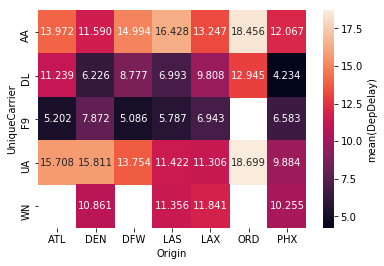

In [91]:
cat_means = result.groupby(['Origin', 'UniqueCarrier']).mean()['DepDelay']
cat_means = cat_means.reset_index(name = 'DepDelay_avg')
cat_means = cat_means.pivot(index = 'UniqueCarrier', columns = 'Origin',
                            values = 'DepDelay_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(DepDelay)'})

- The heatmap above shows the relationship between three variables at once. The three variables being uniquecarrier, origin and mean of departure delay. From the above plot United Airlines and American Airlines are two carriers with highest depature delay occurring at the airport ORD(O'Hare international airport).

#### Similar to the above plot lets look at the correlation between the variables destination, uniquecarrier and mean(arrivaldelay).

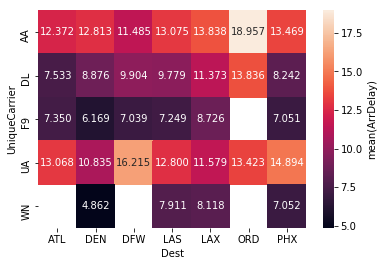

In [92]:
cat_means = result.groupby(['Dest', 'UniqueCarrier']).mean()['ArrDelay']
cat_means = cat_means.reset_index(name = 'ArrDelay_avg')
cat_means = cat_means.pivot(index = 'UniqueCarrier', columns = 'Dest',
                            values = 'ArrDelay_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(ArrDelay)'})

Similar to the above heatmap in this plot also Carrier (United Airlines, American Airlines) and Destination (ORD, DFW) have the highest Arrival Delay.

#### Now correlation plot of the variables origin, uniquecarrier and mean of cancelled.

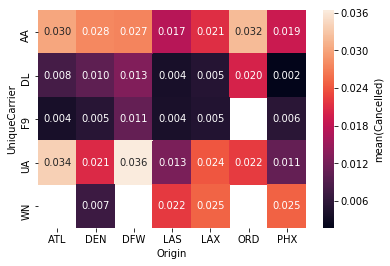

In [67]:
cat_means = result.groupby(['Origin', 'UniqueCarrier']).mean()['Cancelled']
cat_means = cat_means.reset_index(name = 'Cancelled_avg')
cat_means = cat_means.pivot(index = 'UniqueCarrier', columns = 'Origin',
                            values = 'Cancelled_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Cancelled)'})

This heatmap shows that UA(united Airlines) and AA(American Airlines) at the origin airports ORD(O'Hare international Airport), DFW(Dallas/Fort worth international airport), ATL(Atlanta international airport) have the highet cancelled flights. Which is in complete accordance with the above bivariate plot.

#### Next correlation plot of the variables Destination, uniquecarrier and diverted.

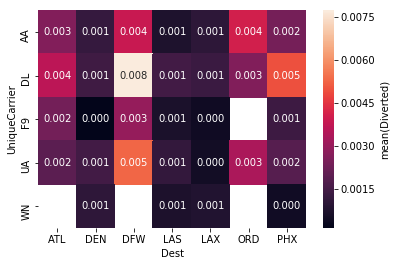

In [75]:
cat_means = result.groupby(['Dest', 'UniqueCarrier']).mean()['Diverted']
cat_means = cat_means.reset_index(name = 'Diverted_avg')
cat_means = cat_means.pivot(index = 'UniqueCarrier', columns = 'Dest',
                            values = 'Diverted_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(Diverted)'})

Compared to the cancelled flights the number of diverted flights is less. UA(United Airlines), AA(American Airlines) and DL(Delta Airlines) reaching the Destination DFW(Dallas/Fort worth international airport), ORD(O'Hare international airport) and PHX(Phoenix international airport) have the most flights diverted.

#### I want to look at the scatter plot between all the delay variables and also i want to correlation plot between the delay variables to get a stronger understanding of the relation between them.

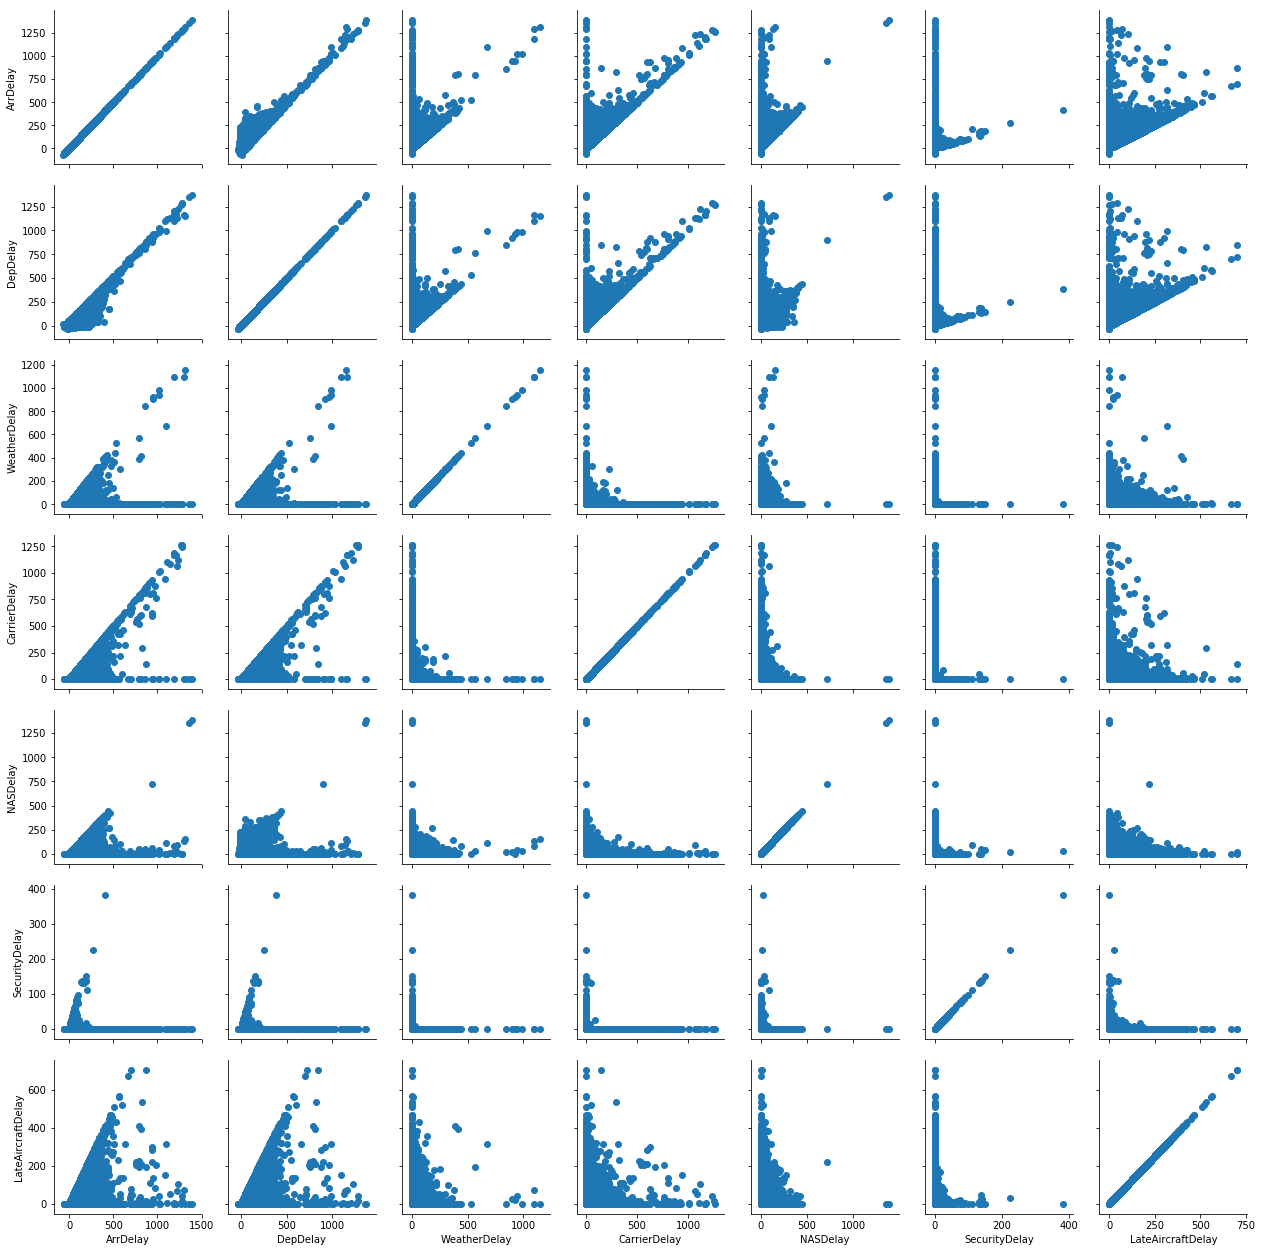

In [97]:
Delays = ['ArrDelay', 'DepDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay','SecurityDelay', 'LateAircraftDelay']
g = sb.PairGrid(data = result, vars= Delays)
g.map(plt.scatter)

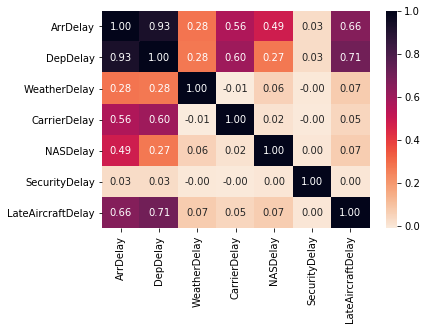

In [98]:
sb.heatmap(result[Delays].corr(), cmap = 'rocket_r', annot = True, fmt ='.2f');

The above scatter plot plots the relation between all the numeric variables with the heatmap above showing the correlation between the numeric variables. 
 ##### The points observed from the above heatmap are:
 ##### 1. Arrival delay shows strong correlation with Late Aircraft delay, Carrier delay and NAS  delay.
 ##### 2. Departure delay showing a strong correlation with Late Aircraft delay and Carrier delay.
 
 ##### Thus the reasons for Arrival delay and departure delay can be attributed to Late aircraft delay, Carrier delay and NAS delay.
 

#### Now i want to see in which month and year does most cancellations occur by plotting a clustered bar between the variables month, cancelled and year.

C:\Users\rcraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


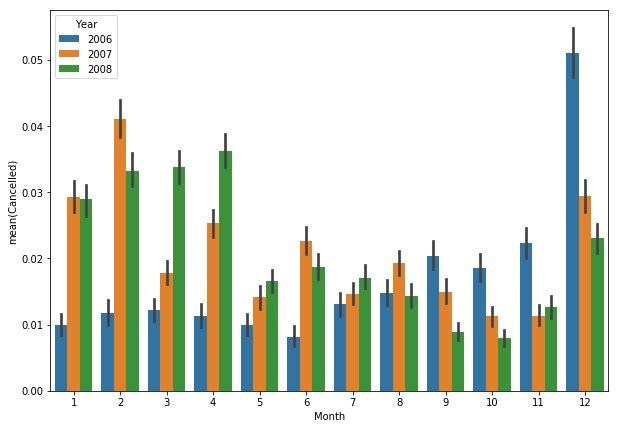

In [84]:
plt.figure(figsize= [10,7])
x = sb.barplot(data = result, x = 'Month', y = 'Cancelled', hue = 'Year')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Year')
plt.ylabel('mean(Cancelled)')
plt.show()

The above clustered bar chart shows in which month and year most flights were cancelled. In the year 2006, month December most number of flights were cancelled. From the month 5 to 10 thers isn't much difference. But the months 12,1,2 have more flights cancelled compared to other. This is may be due to the Winter season and extreme weather conditions. So we may want to look at the relation between types of delays and cancelled flights to get a clear view.

#### Next i want to plot a clustered bar chart between the variabels origin, uniquecarrier and cancelled.

C:\Users\rcraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


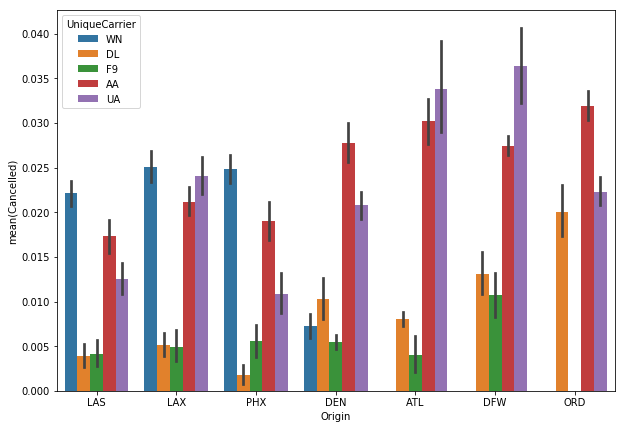

In [85]:
plt.figure(figsize= [10,7])
x = sb.barplot(data = result, x = 'Origin', y = 'Cancelled', hue = 'UniqueCarrier')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Year')
plt.ylabel('mean(Cancelled)')
plt.show()

This plot is to show which airports were home to most number of cancelled flights. As seen from the above plot UA(United Airlines) and AA(American Airlines) flights were cancelled the most at the destinations DFW, ORD, ATL.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My plots and relationships include;

>plot between the variables cancellation, origin and unique carrier

>plot between the variabels Arr delay, dest and unique carrier

>plot between the variabels dep delay, Arr and unique carrier

>plot between the variabels Diverted, origin and unique carrier

> The results obtained from the correlation plot i.e (correlation between arr delay, dep delay and late aircraft delay, and carrier delay) strengthened my observation of these plots.

### Were there any interesting or surprising interactions between features?

> I've found that from the correlation plot which is plotted in this investigation, Which shows a reasonable strong correlation between arr delay, dep delay and (late aircraft delay, carrier delay).

> Carrier delay is also the main reason for cancellation which has been observed from the plots in the univariate exploration part. Which states that carrier delay is the main reason for cancellation, arr delay and dep delay of most of the flights.

> From the selected carriers UA(United Airlines) and AA(American Airlines) are the two airlines with most canellations and delays.

> The airports which are home to cancellations and delays are ORD and DFW.

> Thus it can be concluded that carrier delay is the main reason for most of the flights being cancelled and delayed with the carriers being UA, AA and aiports DFW, ORD. 